## Loading useful libraries and modules

In [1]:
import re
import string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

from pprint import pprint

## Loading and preprocessing raw text data

In [2]:
raw_train_data = pd.read_csv('./data/Corona_NLP_train.csv', usecols=['OriginalTweet'])

In [3]:
# Regular expressions
remove_urls = re.compile(r'https?://\S+|www\.\S+')
remove_hashtags = re.compile(r'#\w+')
remove_emails = re.compile(r'\S+@\S+')
remove_rt = re.compile(r'^RT[\s]+')
remove_numbers = re.compile(r'\d+')

# Punctuation
punctuation = string.punctuation

# Load NLTK stop words
nltk_stop_words = stopwords.words('english')
nltk_stop_words.append('amp')

# Instantiate TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False,  # lowercase
                       strip_handles=True,   # remove handles
                       reduce_len=True)      # reduce repetitions

def preprocess_text(text):

    text = remove_urls.sub('', text)  # remove urls

    # Parse HTML
    text = BeautifulSoup(text, "html.parser").get_text()

    text = remove_emails.sub('', text)    # remove emails
    text = remove_hashtags.sub('', text)  # remove hashtags    
    text = remove_rt.sub('', text)        # remove RT
    
    # Encoding-decoding text
    text = text.encode('ascii', 'replace').decode('utf-8') 

    # Tokenization
    tokens = tknzr.tokenize(text)

    # Remove stop words
    tokens = [token for token in tokens if token not in nltk_stop_words 
              and token.isalpha() and len(token) > 1]
    
    return ' '.join(tokens)

In [4]:
%%time
raw_train_data['OriginalTweet'] = raw_train_data['OriginalTweet'].apply(preprocess_text)

pd.set_option('display.max_colwidth', None)
raw_train_data.head()

Wall time: 15.2 s


,OriginalTweet
0,
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak
3,food stock one empty please panic enough food everyone take need stay calm stay safe
4,ready go supermarket outbreak paranoid food stock litteraly empty serious thing please panic causes shortage


In [5]:
# Compute the word frequency
corpus = ' '.join(raw_train_data['OriginalTweet'])
freq_dist = nltk.FreqDist(TweetTokenizer().tokenize(corpus))

In [6]:
pprint(freq_dist.most_common(50), compact=True)

[('covid', 10613), ('prices', 7847), ('food', 6835), ('store', 6820),
 ('supermarket', 6700), ('grocery', 6087), ('people', 5549), ('consumer', 4298),
 ('shopping', 3371), ('online', 3353), ('get', 2874), ('need', 2713),
 ('pandemic', 2692), ('workers', 2591), ('panic', 2433), ('like', 2369),
 ('us', 2313), ('time', 2298), ('go', 2267), ('demand', 2245), ('home', 2210),
 ('sanitizer', 2139), ('coronavirus', 2126), ('help', 2103), ('hand', 2069),
 ('stock', 1967), ('going', 1952), ('one', 1908), ('due', 1838), ('new', 1732),
 ('buying', 1693), ('please', 1673), ('crisis', 1617), ('work', 1606),
 ('oil', 1517), ('toilet', 1505), ('paper', 1453), ('local', 1427),
 ('stay', 1424), ('today', 1402), ('keep', 1367), ('buy', 1359), ('via', 1352),
 ('stores', 1346), ('many', 1346), ('shelves', 1333), ('still', 1323),
 ('make', 1300), ('see', 1273), ('delivery', 1251)]


## Word cloud

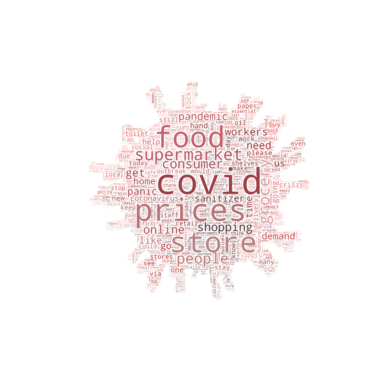

In [7]:
mask = np.array(Image.open('./assets/coronavirus-5280397_1920.jpg')) # image from pixabay

word_cloud = WordCloud(background_color='white',
                       mask=mask,
                       max_words=10_000,
                       random_state=0)

word_cloud.fit_words(freq_dist)

image_colors = ImageColorGenerator(mask)

plt.figure(dpi=100)
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.tight_layout();

plt.savefig('./assets/coronavirus_tweets_classification_word_cloud.png',
            dpi=300,
            facecolor='auto',
            edgecolor='auto')

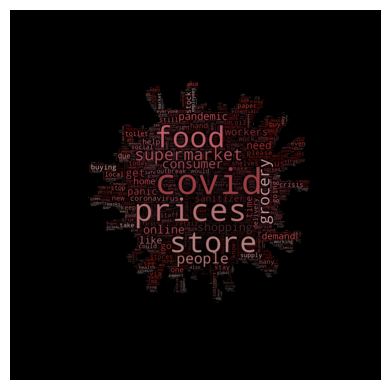

In [8]:
mask = np.array(Image.open('./assets/coronavirus-5280397_1920.jpg')) # image from pixabay

word_cloud = WordCloud(background_color='black',
                       mask=mask,
                       max_words=10_000,
                       random_state=0)

word_cloud.fit_words(freq_dist)

image_colors = ImageColorGenerator(mask)

plt.figure(dpi=100)
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.tight_layout();

plt.savefig('./assets/coronavirus_tweets_classification_word_cloud_v2.png',
            dpi=300,
            facecolor='auto',
            edgecolor='auto')

Reference:

[Generating WordClouds in Python](https://www.datacamp.com/community/tutorials/wordcloud-python)